# 基本
常微分方程式を解くには```scipy.integrate```を使う．  
ソルバーはいくつかあるが，ここでは```solve_ivp```を扱う．  

In [29]:
import scipy.integrate as integrate
import numpy as np
import matplotlib.pyplot as plt

まずは簡単な一次元の微分方程式から考える．  
<img src="https://latex.codecogs.com/svg.image?\dot{x}&space;=&space;ax" title="\dot{x} = ax" />  
<br>
この微分方程式を`solve_ivp`を使って解く．

### 微分方程式の定義
はじめの引数を時刻`t`，次の引数を状態変数`x`にとり，状態変数の微分値を返す関数をつくる．  

In [30]:
def dx(t, x):
    """微分方程式 : y' = y """
    return x

#### 解く
作った微分方程式の関数を```solve_ivp```に投げる．  
必要な引数は以下の通り．  
* ```fun``` : 解きたい微分方程式  
* ```t_span``` : シミュレーション時間  
* ```y0``` : 初期値  
  
以下はオプション  
* ```t_eval``` : 刻み時間を指定  
* ```method``` : 数値解法の種類を指定．デフォルトは精度保証付きで刻み時間を自動で調整するルンゲクッタ45．  
  
オプションは他にもあります．  
公式ページ : [https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)

In [31]:
sol = integrate.solve_ivp(
    fun = dx,  # 微分方程式
    t_span = (0, 5),  # シミュレーション時間
    y0=[1]  # 初期値
)

#### (solve_ivpの解について)
solve_ivpは微分方程式の解を`scipy.integrate._ivp.ivp.OdeResult`として返す．  

In [32]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 32
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.        , 0.10001999, 1.06609106, 2.30431769, 3.64528981,
       5.        ])
 t_events: None
        y: array([[  1.        ,   1.10519301,   2.9040598 ,  10.01740317,
         38.29174533, 148.39440874]])
 y_events: None

よく使うものだけ紹介する．  
* `.message` : 成功したかどうかの文字列  
* `.t` : ndarray．時刻歴．  
* `.y` : ndarray．状態変数の解．  
  
他は公式ページ[https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)をみてください．  

#### 解をプロット
プロットして確認してみる．  
* ```sol.t``` :  
時刻歴  
* ```sol.y[i]``` :  
解の時刻歴．ベクトルのときはiで要素を指定．

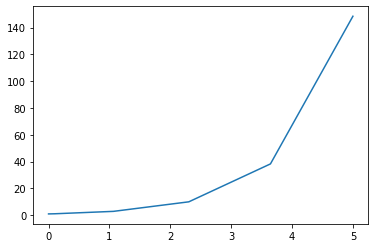

In [33]:
plt.plot(sol.t, sol.y[0])

#### 解析解と比較
上記の微分方程式には厳密解がある．  
<br>
<img src="https://latex.codecogs.com/svg.image?x&space;=&space;Ce^{t}" title="x = Ce^{t}" />  
<br>
数値解`sol`と厳密解を同時にプロットしてみる．  

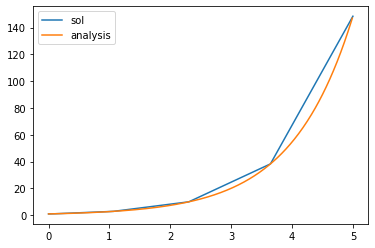

In [34]:
t = np.arange(0, 5, 0.01)
y = np.exp(t)# 解析解

plt.plot(sol.t, sol.y[0], label="sol")
plt.plot(t, y, label="analysis")
plt.legend()

数値解と厳密解がほぼ一致していることがわかる．  

#### (刻み幅の自動調整について)
デフォルトの`RK45`は内部で刻み幅の自動調整を行っている．  
`sol.t`をプロットすることで刻み幅の変化を確認できる．  

Text(0, 0.5, 'time interval')

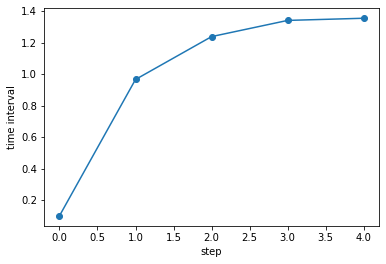

In [35]:
plt.plot(np.diff(sol.t), marker="o")
plt.xlabel("step")
plt.ylabel("time interval")

上図から刻み幅がだんだん大きくなっていることがわかる．  
これは２つ上の図において，数値解のプロットが徐々に粗くなっていることからもわかる．  

****
#### 刻み時間を指定する
上の例では出力された解solの刻み時間が粗いので違和感がある．  
刻み時間を変えてなめらかにしたいときは```t_eval```で指定できる（指定しても刻み時間は可変のまま．固定刻み時間にしたい場合は，scipyを使わず自分で実装する）．  

In [36]:
sol2 = integrate.solve_ivp(
    fun=dx,
    t_span=(0, 5),
    y0=[1],
    t_eval=np.arange(0, 5, 0.01)  # <-コレ
)

##### 解析解と比較
なめらかになっていることがわかる．

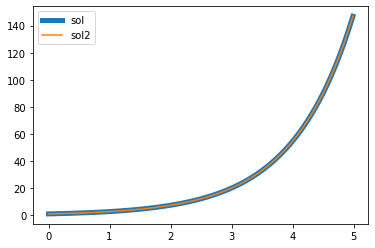

In [37]:
plt.plot(sol2.t, sol2.y[0], label="sol", linewidth=5)
plt.plot(t, y, label="sol2")
plt.legend()

****
#### 微分方程式にパラメータをつける
ようはy' = a*yのような微分方程式を扱いたいということです．  
いくつか方法があります．  
一番簡単なのはパラメータをグローバル変数にすることです．  
```python
a = 2
def dx(t, x):
    return a * x
```
シンプルですが，これだと汎用性がありません  
  
```solve_ivp```では```args```でパラメータを設定できます．  

##### 微分方程式の定義

In [38]:
def dx2(t, x, a):
    return a * x

##### 解く
```args```にパラメータを**タプル**や**配列**で渡す．  

In [39]:
sol3 = integrate.solve_ivp(
    fun=dx2,
    t_span=(0, 5),
    y0=[1],
    t_eval=np.arange(0, 5, 0.01),
    args=(2,)
)

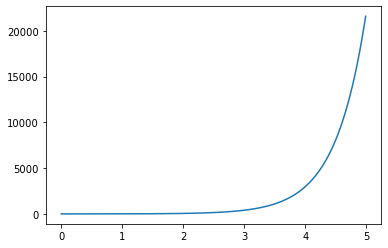

In [40]:
plt.plot(sol3.t, sol3.y[0])

##### よくやるミス  
１つのパラメータだけ渡したいとき，次の間違いを犯すことが多い
```python
sol = integrate.solve_ivp(
    fun=dx2,
    t_span=(0, 5),
    y0=[1],
    args=(2)  # <-エラーになる
)
```
pythonでは`(a)`はタプルにならず，1つの要素だけのタプルを作るためには`(a,)`としなければならない．  

In [41]:
hoge = (2)
type(hoge)

int

In [42]:
hoge2 = (2,)
type(hoge2)

tuple

以下のように書けばよい
```python
sol = integrate.solve_ivp(
    fun=dx2,
    t_span=(0, 5),
    y0=[1],
    args=(2,)  # 正しい
)
```